# Supervised Learning

## 2) Logistic Regression (classification)

### 1-1) Logistic Regression from scratch

In [0]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Step 1. Data Creation

## data ( height and weight of  adults and children)

In [53]:
m = 100
1/m #임의의 데이터 백개 만듦

0.01

In [69]:
adult_height = np.random.normal(175, 5, [m, 1]) #랜덤하게 노멀 디스트리뷰션에서 샘플링하는거고 평균이 175 표준편차가 5인 엠콤마 일의 데이터를 만들어라
adult_weight = np.random.normal(70, 5, [m, 1]) #표준편차를 2로 하면 그러니까 키와 몸무게에 비율적으로 표준편차를 설정하면 데이터 분포가 동그랗게 나옴

adult_dataset = np.concatenate( (adult_weight, adult_height) , axis = 1)

print(adult_dataset.shape) #2개의 피쳐를 갖는 데이터 100개
print(adult_dataset[:5])

(100, 2)
[[ 71.30544727 165.48494522]
 [ 65.02797195 177.31366168]
 [ 72.23888249 174.9530412 ]
 [ 73.83941886 174.97713944]
 [ 70.1242151  171.37324722]]


In [55]:
child_height = np.random.normal(120, 5, [m, 1])
child_weight = np.random.normal(30, 5, [m, 1])

child_dataset = np.concatenate( (child_weight, child_height) , axis = 1)

print(child_dataset.shape)
print(child_dataset[:5])

(100, 2)
[[ 35.47912552 119.51509278]
 [ 37.99012228 127.50039904]
 [ 26.15214859 114.77492334]
 [ 26.23610595 119.78307947]
 [ 31.32335186 116.32908343]]


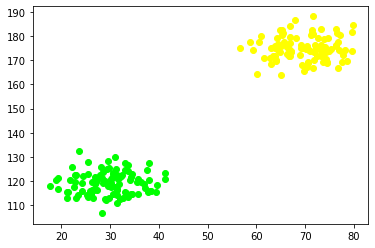

In [56]:
fig = plt.figure() #매트플랏 라이브러리 쓴거
ax1 = fig.add_subplot(111)
ax1.scatter(adult_dataset[:,0], adult_dataset[:,1], c=np.array([(1, 1, 0)]))
ax1.scatter(child_dataset[:,0], child_dataset[:,1], c=np.array([(0, 1, 0)]))
plt.show()

## Label

In [57]:
adult_label = np.ones( shape=[m, 1] )
child_label = np.zeros( shape=[m, 1] )
label = np.concatenate( (adult_label, child_label) )
print('label의 shape' , label.shape)
print(label[:10]) #타겟클래스는 성인, 성인이 1 유아는 0

label의 shape (200, 1)
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


## Data + Label

In [58]:
total_dataset = np.concatenate((adult_dataset , child_dataset)) #2개의 피쳐를 갖는 데이터 200개가 돼버림
total_dataset = np.concatenate( (total_dataset, label), axis = 1  ) #200행 3열이 됨

np.random.shuffle(total_dataset) # Shuffle dataset 셔플되면 뭐가 유아이고 성인인지 모르니까 위에서 레이블링 먼저해주는거임
print(total_dataset[:10])
print(total_dataset.shape)

[[ 73.36551075 171.78373957   1.        ]
 [ 76.99300548 174.2270371    1.        ]
 [ 30.2277517  120.89770602   0.        ]
 [ 64.48098396 174.17811836   1.        ]
 [ 71.47618293 181.20023748   1.        ]
 [ 77.20438481 180.52561163   1.        ]
 [ 72.74805509 179.31503935   1.        ]
 [ 21.29683738 115.62482468   0.        ]
 [ 74.51035988 169.45795864   1.        ]
 [ 25.21968039 114.20811628   0.        ]]
(200, 3)


## simple scaling of dataset

In [0]:
weight_mean= total_dataset[:, 0].mean()
height_mean= total_dataset[:, 1].mean()
total_dataset[:, 0] /= weight_mean
total_dataset[:, 1] /= height_mean 
#스케일링 하는 이유 : 학습속도가 빨라짐 데이터가 너무 많아서 웨이트를 너무 많이 수정해야 될 수도 있으니까 각 피쳐들 간의 중요도가 값의 크기 때문에 정해지지않도록 동일하게 맞춰줌 그니까 키가 몸무게보다 값이 당연히 크니까 중요하게 머신ㄴ이 여길까봐
#이제는 키와 몸무게에 대한 비율의 정보만 남은거임
#새로운 데이터가 추가될 경우 이러한 전처리 과정을 꼭 거쳐야한다.

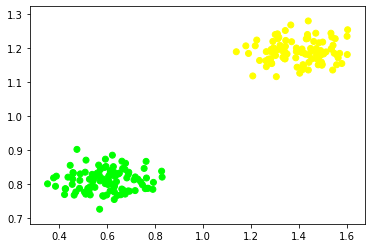

In [60]:
total_dataset.shape

fig = plt.figure()
ax1 = fig.add_subplot(111)
color = [(1*i, 1, 0) for i in total_dataset[:,2] ]
ax1.scatter(total_dataset[:,0], total_dataset[:,1], c = color)
plt.show()

# Step 2. Model definition

In [0]:
def hypothesis(x, w, b):
    pred = np.matmul(x, w.T) + b #내적
    return pred

In [0]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [0]:
def cost(x, w, b, y):
    loss = -y*hypothesis(x, w, b) + np.log(1 + np.exp(hypothesis(x, w, b))) #-y*h(x) + log(1+exp(h(x)))
    cost = (1/m)*np.sum(loss)
    return cost

In [0]:
def derivative(x, w, b, y):
    dw = -(1/m)* np.sum( x*(y - sigmoid(hypothesis(x, w, b))) , axis = 0) # 1 x w_dim
    db = -(1/m)* np.sum( y  - sigmoid(hypothesis(x, w, b)), axis = 0 )
    return dw, db

In [0]:
def update(x, w, b, y, alpha):
    w = w - alpha*(derivative(x, w, b, y)[0]) # w := w + alpha * dw
    b = b - alpha*(derivative(x, w, b, y)[1]) # b := b + alpha * db
    return w, b

# Step 3. Training model

In [0]:
# initialization of weights and bias
w = np.array([[0, 0]])
b = 0

x = total_dataset[:, :2] # x1, x2
y = total_dataset[:, 2:3] # label

## 아래 두 개 cell을 반복하여 실행하며, 선형 분류기의 위치 변화를 관찰해보세요.

In [0]:
def train(_iter, x, w, b, y):
    for i in range(_iter):
        w, b = update(x, w, b, y, alpha=0.01)
    print ('cost =',cost(x, w, b, y))
    print ('w =',w)
    print ('b =',b)
    return w, b

cost = 1.2082361904716032
w = [[0.49956463 0.10252474]]
b = [-0.25515201]


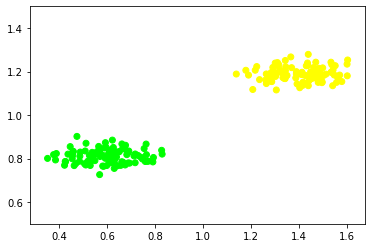

cost = 1.090480591193571
w = [[0.84704269 0.09022813]]
b = [-0.59427435]


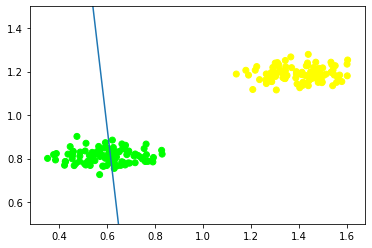

cost = 0.9901958384845052
w = [[1.16264051 0.07557765]]
b = [-0.9122687]


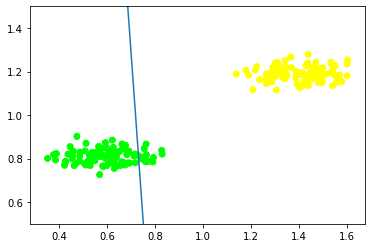

cost = 0.904389643518293
w = [[1.45439775 0.0634907 ]]
b = [-1.20663752]


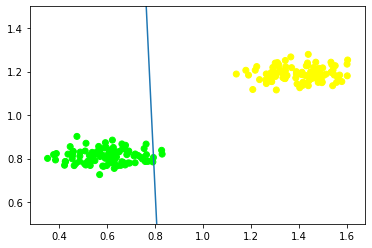

cost = 0.8306082979254175
w = [[1.72492278 0.05378474]]
b = [-1.47966806]


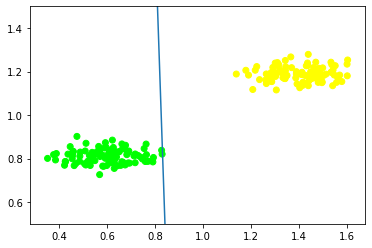

cost = 0.7668122666493099
w = [[1.9763954  0.04608325]]
b = [-1.7336672]


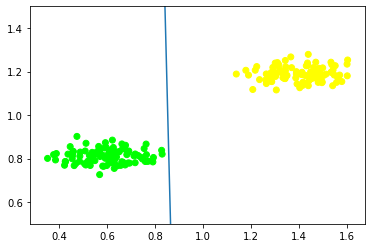

cost = 0.7113254009436514
w = [[2.21079035 0.04006302]]
b = [-1.9707009]


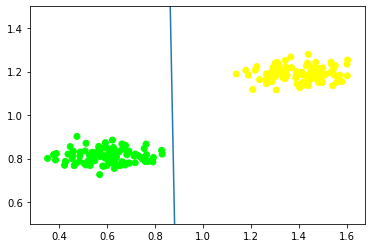

cost = 0.6627782428046376
w = [[2.42987873 0.03545715]]
b = [-2.19258979]


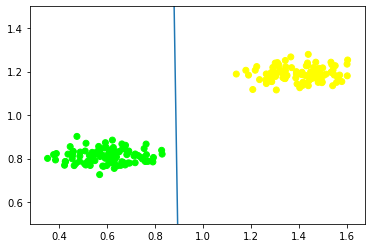

cost = 0.6200540426062396
w = [[2.63523315 0.03204566]]
b = [-2.40092855]


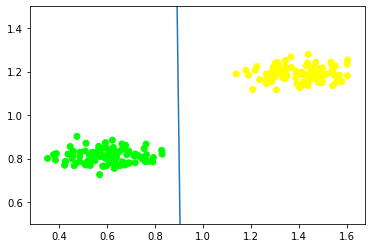

cost = 0.5822413992294387
w = [[2.82824148 0.02964686]]
b = [-2.59711012]


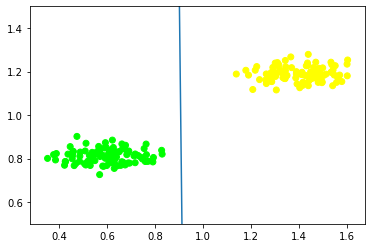

cost = 0.5485945496343061
w = [[3.01012473 0.02811019]]
b = [-2.78235039]


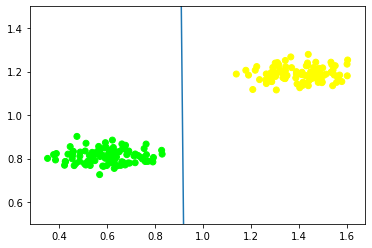

cost = 0.5185009334146986
w = [[3.1819559  0.02731034]]
b = [-2.95771153]


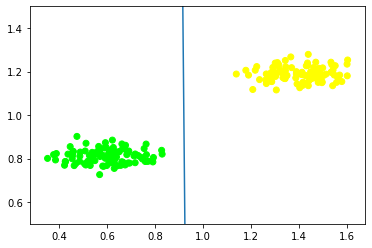

cost = 0.4914550963925791
w = [[3.34467824 0.02714265]]
b = [-3.12412305]


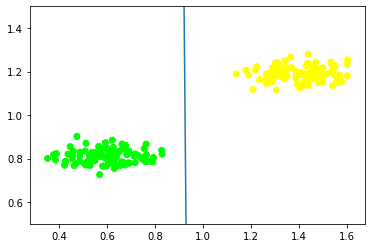

cost = 0.467037865395031
w = [[3.49912198 0.02751923]]
b = [-3.28240023]


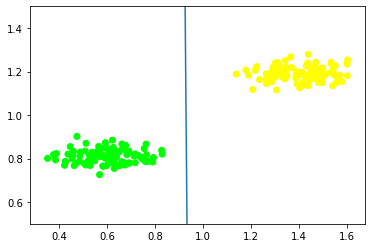

cost = 0.4448997908404245
w = [[3.64601931 0.02836597]]
b = [-3.43326019]


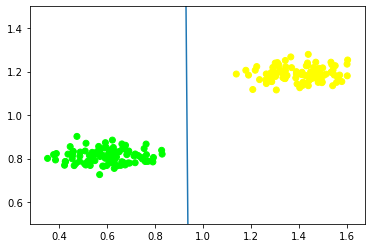

In [68]:
for i in range(15):
    w, b = train(200, x, w, b, y)
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    color = [(1*i, 1, 0) for i in total_dataset[:,2] ]
    ax1.scatter(total_dataset[:,0], total_dataset[:,1], c = color)


    p1 = np.array([0, -b/w[0, 1]])
    p2 = np.array([-b[0]/w[0, 0], 0]) # b has the shape as [1]
    coefficients = np.polyfit([p1[0], p2[0]], [p1[1][0], p2[1]], 1)  #얘네 자료형 문제일것같기 때문에 출력해서 한번보고 리스트인 경우가 있음 그럼 리스트에서 element를 끄집어내면 되니까 p[1]뒤에 [0]써준 거임
    polynomial = np.poly1d(coefficients)
    x_axis = np.linspace(0.5, 1.5)
    y_axis = polynomial(x_axis)
    ax1.set_ylim(0.5, 1.5)
    ax1.plot(x_axis, y_axis)

    plt.show()
